# Data Points with Mean and Outliers Highlighted

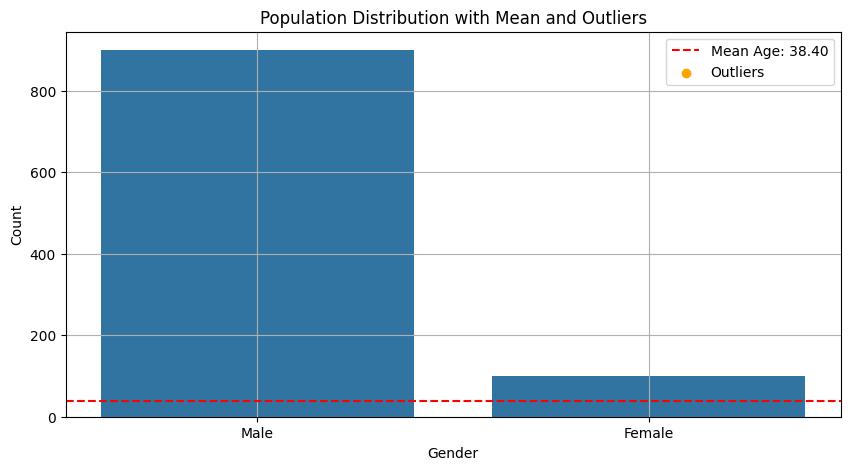

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Create a population of 1000 individuals with demographic information
population_size = 1000
genders = np.random.choice(['Male', 'Female'], size=population_size, p=[0.9, 0.1])  # 90% Male, 10% Female
ages = np.random.randint(18, 60, size=population_size)  # Random ages between 18 and 60

# Create a DataFrame to represent the population
population_df = pd.DataFrame({'Gender': genders, 'Age': ages})

# Function to plot population distribution with mean and outliers
def plot_population_distribution_with_stats(df, title):
    plt.figure(figsize=(10, 5))
    
    # Countplot for gender distribution
    sns.countplot(x='Gender', data=df)
    
    # Calculate and plot mean
    mean_value = df['Age'].mean()
    plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean Age: {mean_value:.2f}')
    
    # Identifying outliers based on IQR
    Q1 = df['Age'].quantile(0.25)
    Q3 = df['Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
    
    # Highlight outliers
    plt.scatter(outliers.index, outliers['Age'], color='orange', label='Outliers', zorder=5)
    
    plt.title(title)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()
    plt.show()

# Plot the population distribution with mean and outliers
plot_population_distribution_with_stats(population_df, 'Population Distribution with Mean and Outliers')
